Build the linear regression model using scikit learn in boston data to predict
'Price' based on other dependent variable.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston

In [2]:
boston = load_boston()
bos = pd.DataFrame(boston.data)

In [3]:
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
bos.columns=boston.feature_names

In [5]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [7]:
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [8]:
import seaborn as sns

<AxesSubplot:>

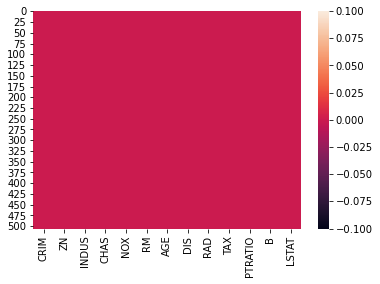

In [9]:
sns.heatmap(bos.isnull())

<AxesSubplot:>

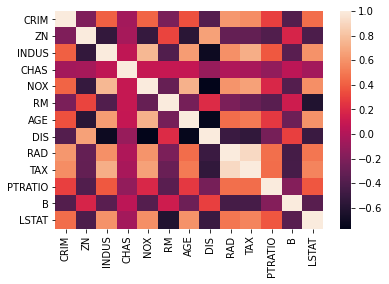

In [10]:
sns.heatmap(bos.corr())

Text(0, 0.5, 'No of houses')

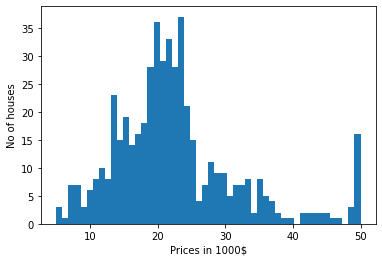

In [11]:
plt.hist(boston.target,bins=50)
plt.xlabel('Prices in 1000$')
plt.ylabel('No of houses')

In [12]:
bos['Price']=boston.target

In [13]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [14]:
X=bos.drop('Price',axis=1)
Y=bos['Price']

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lreg=LinearRegression()

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=100)

In [18]:
print(X_train.shape)
print(X_test.shape)

(379, 13)
(127, 13)


In [19]:
lreg.fit(X_train,Y_train)

LinearRegression()

In [20]:
print("the estimated intercept is %.2f"%lreg.intercept_)

the estimated intercept is 33.63


In [21]:
print("the number of coeff's is %d"%len(lreg.coef_))

the number of coeff's is 13


In [22]:
coeff_df=pd.DataFrame(lreg.coef_,X.columns)
coeff_df

,0
CRIM,-0.079194
ZN,0.045735
INDUS,-0.019162
CHAS,2.424250
NOX,-13.756639
RM,3.852951
AGE,-0.013203
DIS,-1.482416
RAD,0.296990
TAX,-0.013167


In [23]:
pred_train=lreg.predict(X_train)
print(pred_train)

[18.65828801 20.87753607 21.45097762 27.99498089 18.50613498 28.13027808
 19.43571343 28.85421305 40.54802179 17.97739312 26.47031295 21.65464981
 24.61691735 14.49650311  7.88642844 14.03198133 28.49748085 29.93555974
 17.69530999 24.21024869 28.266976   20.26263856 31.09803135 18.42412122
 39.55451483 22.16707083 23.47731215 19.10195596 29.93908613 24.84158257
 17.64025853 20.64306013 14.9834085  19.38786734 31.8161197  26.13819879
 13.91691221 23.15992212 24.99111115 15.30251334 27.45407984 16.60217952
 15.0326124  27.83703699 27.19892998 21.62709787 34.14312124 28.2182328
 24.41497096 26.42071336 19.81887069 31.14796724 22.25620695 30.55674309
 17.80333506 16.91284805 28.74320345 21.64855109 14.85352986 20.93107602
 27.86630652 39.21148369 22.09822277 28.92834065 18.15453243  2.46147437
 18.75342635 32.68241601 12.90096457  9.87559262 10.38871151 33.17178184
 18.98667414 16.90466754 11.25276006 22.31947108 29.54147647 23.28250379
 33.31814224 19.38068668 17.79219776 17.82194941 13.

In [24]:
pred_test=lreg.predict(X_test)

In [25]:
print(pred_test)

[34.32560931 31.2633507  22.28003335 17.86975069 20.40606949 25.91303352
 26.15242179 23.66375418 22.30169002 19.59234366 26.75489062 17.29420545
 20.80817579 15.46781924 41.69247941 20.16746428 28.77029186 19.02021072
 32.38988683 40.43872985 35.04799251 16.83853764 20.33053373 18.09797446
 13.80644424 12.41884725 27.47062888 20.40507455 18.75428942 20.25662126
 15.46268828 24.40432932 39.15237132 24.76295642 31.78210045 28.38346572
 15.00749275 14.45446654 16.73702223 23.29876692 22.95875889 23.59744316
 13.77412361 21.39735646 31.29998733 26.66234266 19.32157368 15.87491845
 17.2294449  12.65256962 21.71569722 20.1686083  23.61536492 24.10587542
 11.97825659 14.74341261 24.86442941 34.10640748 10.12033231 20.89367197
 17.54551737 19.5997927  17.74536973 30.04265302 21.0171677  25.35489057
 15.73563341 25.06394771 22.10298887 20.650107   18.9977398  23.86107741
  4.5646274  16.19927159 28.24706568  9.33885296 24.96408521 35.16045906
 12.13946061 27.04201503 34.97358688 40.87106434 14

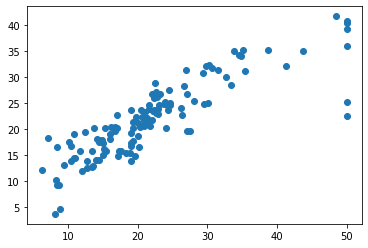

In [26]:
plt.scatter(Y_test,pred_test)

In [27]:
df=pd.DataFrame({'original':Y_test,'Predicted':pred_test})

In [28]:
df.head(10)

,original,Predicted
198,34.6,34.325609
229,31.5,31.263351
502,20.6,22.280033
31,14.5,17.869751
315,16.2,20.406069
169,22.3,25.913034
111,22.8,26.152422
206,24.4,23.663754
108,19.8,22.301690
420,16.7,19.592344


In [29]:
from sklearn import metrics

In [30]:
print('MAE :{}'.format(metrics.mean_absolute_error(Y_test,pred_test)))
print('MSE :{}'.format(metrics.mean_squared_error(Y_test,pred_test)))
print('RMsE :{}'.format(np.sqrt(metrics.mean_squared_error(Y_test,pred_test))))

MAE :3.388403871408002
MSE :27.17314417304355
RMsE :5.212786603443838
